In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
p18 = pd.read_csv('players_18.csv', encoding='latin-1') #players_18.csv file, some of the cases we encoded in latin1
p19 = pd.read_csv('players_19.csv', encoding='latin-1') #players_19.csv file, some of the cases we encoded in latin1
m_results = pd.read_csv('match_result.csv', encoding='latin-1') #match_results.csv file, some of the cases we encoded in latin1

In [3]:
#dropping unneeded variables from the player_18 and player_19 csv files first

#list of variables of interest (voi) that we want to keep for our models
voi_player = ['short_name', 'age', 'height_cm', 'weight_kg', 'club', 'wage_eur',
      'pace' ,'shooting', 'passing', 'dribbling', 'defending',
      'gk_handling', 'gk_speed', 'gk_kicking', 'gk_diving', 'gk_positioning']

columns_list_18 = p18.columns.values.tolist() #list of all columns
columns_list_19 = p19.columns.values.tolist()

for i in range(len(columns_list_18)): #iterate through list of columns
    if columns_list_18[i] not in voi_player: #if column is not in our variables of interest list
        p18.pop(columns_list_18[i]) #remove it from the df
        
for i in range(len(columns_list_19)):
    if columns_list_19[i] not in voi_player:
        p19.pop(columns_list_19[i])

In [4]:
p18['short_name'] = p18['short_name'].astype('category') #setting to correct variable types
p18['club'] = p18['club'].astype('category') #setting to correct variable types
p19['short_name'] = p19['short_name'].astype('category') #setting to correct variable types
p19['club'] = p19['club'].astype('category') #setting to correct variable types

In [5]:
p18.shape #confirming we cut out the 87 unneeded columns

(17592, 16)

In [6]:
p19.shape #confirming we cut out the 87 unneeded columns

(17770, 16)

In [7]:
#dropping unneeded variables from the match_results csv

#list of variables of interest (voi) that we want to keep for our models
voi_match = ['FTHG', 'FTAG', 'FTR', 'HomeTeam', 'AwayTeam']

columns_list_match = m_results.columns.values.tolist()

for i in range(len(columns_list_match)): #iterate through list of columns
    if columns_list_match[i] not in voi_match: #if column is not in our variables of interest list
        m_results.pop(columns_list_match[i]) #remove it from the df

In [8]:
m_results.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Standard de Liège,KAA Gent,3,2,H
1,KV Kortrijk,RSC Anderlecht,1,4,A
2,KV Oostende,Royal Excel Mouscron,2,1,H
3,Sint-Truidense VV,KSV Cercle Brugge,0,0,D
4,SV Zulte-Waregem,Waasland-Beveren,2,2,D


In [9]:
m_results['HomeTeam'] = m_results['HomeTeam'].astype('category') #setting to correct variable types
m_results['AwayTeam'] = m_results['AwayTeam'].astype('category')
m_results['FTR'] = m_results['FTR'].astype('category')
m_results['FTR']= m_results['FTR'].replace(['H','A','D'],[1,2,0])
m_results.head()


,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Standard de Liège,KAA Gent,3,2,1
1,KV Kortrijk,RSC Anderlecht,1,4,2
2,KV Oostende,Royal Excel Mouscron,2,1,1
3,Sint-Truidense VV,KSV Cercle Brugge,0,0,0
4,SV Zulte-Waregem,Waasland-Beveren,2,2,0


In [10]:
# p18.to_csv('players_18.csv')
# p19.to_csv('players_19.csv')
# m_results.to_csv('match_result.csv')

In [11]:
#group by teams and calculate the standard deviation
p18_team_sd = p18.groupby('club').mean().sort_values('wage_eur',ascending=False)
p19_team_sd = p19.groupby('club').mean().sort_values('wage_eur',ascending=False)

In [12]:
#group by team and calculate the mean
p18_team_mean = p18.groupby('club').mean().sort_values('pace',ascending=False)
p19_team_mean = p19.groupby('club').mean().sort_values('pace',ascending=False)

In [13]:
#preparing to merge table, by standard deviation
HomeStatsSd = p18_team_sd
HomeStatsSd = HomeStatsSd.add_prefix('Home ')
HomeStatsSd = HomeStatsSd.reset_index()
AwayStatsSd = p18_team_sd
AwayStatsSd = AwayStatsSd.add_prefix('Away ')
AwayStatsSd = AwayStatsSd.reset_index()

In [14]:
temp = pd.merge(m_results,HomeStatsSd,'left',left_on='HomeTeam',right_on='club')
sd_table = pd.merge(temp, AwayStatsSd, 'left',left_on='AwayTeam',right_on='club')  #final table, all stats are sd

In [15]:
#preparing to merge table, by mean
HomeStatsMean = p18_team_mean
HomeStatsMean = HomeStatsMean.add_prefix('Home ')
HomeStatsMean = HomeStatsMean.reset_index()
AwayStatsMean = p18_team_mean
AwayStatsMean = AwayStatsMean.add_prefix('Away ')
AwayStatsMean = AwayStatsMean.reset_index()

In [16]:
temp = pd.merge(m_results,HomeStatsMean,'left',left_on='HomeTeam',right_on='club')
mean_table = pd.merge(temp, AwayStatsMean, 'left',left_on='AwayTeam',right_on='club')  #final table, all stats are mean

In [17]:
mean_table.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'club_x', 'Home age',
       'Home height_cm', 'Home weight_kg', 'Home wage_eur', 'Home pace',
       'Home shooting', 'Home passing', 'Home dribbling', 'Home defending',
       'Home gk_diving', 'Home gk_handling', 'Home gk_kicking',
       'Home gk_speed', 'Home gk_positioning', 'club_y', 'Away age',
       'Away height_cm', 'Away weight_kg', 'Away wage_eur', 'Away pace',
       'Away shooting', 'Away passing', 'Away dribbling', 'Away defending',
       'Away gk_diving', 'Away gk_handling', 'Away gk_kicking',
       'Away gk_speed', 'Away gk_positioning'],
      dtype='object')

In [18]:
mean_table = mean_table.dropna()
mean_table.shape

(2638, 35)

In [19]:
X = mean_table.drop(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'club_x','club_y'], axis=1)
y = mean_table['FTR']

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

Text(0, 0.5, 'Testing Accuracy')

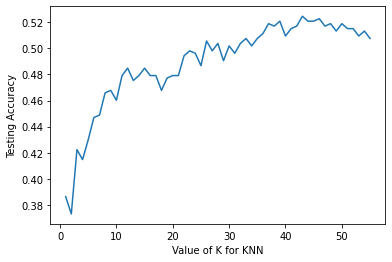

In [40]:
#The validation set approach
scores = []
for K_neigh in range(1, 56):
    knn = KNeighborsClassifier(n_neighbors=K_neigh)
    knn.fit(X_train, y_train)

    pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

import matplotlib.pyplot as plt

plt.plot(range(1, 56), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [44]:
print(scores.index(max(scores)))

42


In [50]:
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[ 14  89  26]
 [ 14 189  34]
 [  9  79  74]]
0.5246212121212122


In [63]:
#Grid search approach
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 56)}
knn_gscv = GridSearchCV(knn2, params, scoring='accuracy', cv = 10)

knn_gscv.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55])},
             scoring='accuracy')

In [64]:
knn_gscv.best_params_


{'n_neighbors': 55}

In [65]:
knn_gscv.best_score_


0.48070198179513773

In [67]:
# K-fold approach
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold_cv =KFold(n_splits=10, shuffle=True, random_state=1)
knn_cv = KNeighborsClassifier(n_neighbors=43)
scores = cross_val_score(knn_cv, X, y, scoring='neg_mean_squared_error', cv = kfold_cv)
kfold_mse = np.mean(-scores)
print('10 Fold MSE:', kfold_mse)

10 Fold MSE: 0.8066669547182854
